In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
# nltk.download('all')
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

In [2]:
pd.set_option('display.max_columns', 10)
data = pd.read_csv('yelp.csv')
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
# print(data.columns)
# print(data.dtypes)
# print(data.describe(include='all'))

In [72]:
data['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [4]:
data['length'] = data['text'].apply(len)

In [5]:
data = data[['date', 'stars', 'text', 'cool', 'useful', 'funny', 'length']]
data.head()

,date,stars,text,cool,useful,funny,length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


In [6]:
reviews = list(data['text'])
len(reviews)

10000

In [7]:
reviews[:5]

['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!',
 'I have no idea why some people give bad reviews about this place. It goes to show you, you can

In [8]:
review = reviews[0]
print(review)
print('\n')
print(len(review.split()))

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


155


In [9]:
import re
pattern = '\w{2,}'
bag_of_words = re.findall(pattern, review)
print(len(bag_of_words))
# bag_of_words

151


In [10]:
# list(string.punctuation)

In [11]:
# Standardizing text

In [12]:
bag_of_words = [word.lower() for word in bag_of_words]

In [13]:
# Removing Stop Words

In [14]:
stop_words_english = stopwords.words('english')
stop_words_english.extend(['use', 'us', 'make', 'also', 'tell'])
# stop_words_english

In [15]:
bag_of_words = [word for word in bag_of_words if word not in stop_words_english]

In [16]:
len(bag_of_words)

76

In [17]:
# Stemming

In [18]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter_bag_of_words = [porter.stem(word) for word in bag_of_words]

In [19]:
# porter_bag_of_words

In [20]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer('english')
snowball_bag_of_words = [snowball.stem(word) for word in bag_of_words]

In [21]:
# snowball_bag_of_words

In [22]:
# Lemmatization

In [23]:
# from nltk.wordnet import WordNetLemmatizer
from nltk import wordnet
lemmatizer = wordnet.WordNetLemmatizer()
bag_of_words = [lemmatizer.lemmatize(word) for word in bag_of_words]

In [24]:
# bag_of_words

In [25]:
def bagOfWords(x):
    pattern = '\w{2,}'
    bag_of_words = re.findall(pattern, x)
    bag_of_words = [word.lower() for word in bag_of_words]
    bag_of_words = [word for word in bag_of_words if word not in stop_words_english]
    bag_of_words = [lemmatizer.lemmatize(word) for word in bag_of_words]
    return bag_of_words

In [26]:
nested_list = list(map(bagOfWords, reviews))

In [27]:
# nested_list

In [28]:
words = [word for item in nested_list for word in item]

In [29]:
len(words)

650672

In [30]:
# " ".join(words)

In [31]:
from wordcloud import WordCloud

In [32]:
wordcloud = WordCloud().generate(" ".join(words)) 

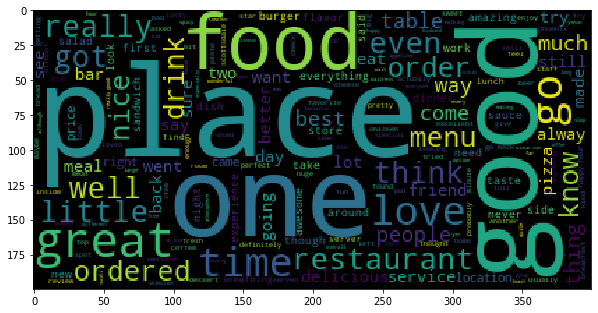

In [33]:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud) 
plt.show()

In [34]:
data.head()

,date,stars,text,cool,useful,funny,length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


In [35]:
data.shape

(10000, 7)

In [36]:
def cleaning(x):
    pattern = '\w{2,}'
    temp = re.findall(pattern, x)
    temp = [word.lower() for word in temp]
    temp = [word for word in temp if word not in stop_words_english]
    temp = [lemmatizer.lemmatize(word) for word in temp]
    return ' '.join(temp)

In [37]:
data['clean_txt'] = list(map(cleaning, data['text']))

In [38]:
data.head()

,date,stars,text,cool,useful,funny,length,clean_txt
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,889,wife took birthday breakfast excellent weather...
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,1345,idea people give bad review place go show plea...
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,76,love gyro plate rice good dig candy selection
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419,rosie dakota love chaparral dog park convenien...
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469,general manager scott petello good egg go deta...


In [39]:
x = data['clean_txt'][0:100]
y = data['stars'][0:100]

In [40]:
x

0     wife took birthday breakfast excellent weather...
1     idea people give bad review place go show plea...
2         love gyro plate rice good dig candy selection
3     rosie dakota love chaparral dog park convenien...
4     general manager scott petello good egg go deta...
5     quiessence simply put beautiful full window ea...
6     drop drive ate go back next day food good cute...
7     luckily travel far connecting flight thank pho...
8     definitely come happy hour price amazing sake ...
9     nobuo show unique talent everything menu caref...
10    oldish man owns store sweet perhaps sweeter co...
11    wonderful vietnamese sandwich shoppe baguette ...
12    limited time thing going right bbq chicken piz...
13    good tattoo shop clean space multiple artist c...
14    week new phoenix looked irish bar town found r...
15    worth 21 salad small pizza absolutely bad serv...
16    went saturday afternoon place incredibly empty...
17    okay best place ever grew shopping one los

In [41]:
vector = CountVectorizer().fit(x)
X = vector.transform(x)

In [42]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [106]:
text = ['My name is himanshu', 'let us learn NLP']
vectorizer = CountVectorizer()
vector_form = vectorizer.fit_transform(text)
vector_form

<2x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [107]:
vector_form.toarray()

array([[1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1]])

In [44]:
vectorizer.get_feature_names()

['himanshu', 'is', 'learn', 'let', 'my', 'name', 'nlp', 'us']

In [45]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
vector_form = vectorizer.fit_transform(text)
vector_form.toarray()

array([[1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1]])

In [46]:
vectorizer.get_feature_names()

['is himanshu', 'learn nlp', 'let us', 'my name', 'name is', 'us learn']

In [131]:
vectorizer = TfidfVectorizer()
test = vectorizer.fit_transform(text)

In [133]:
test.toarray()

array([[0.5, 0.5, 0. , 0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0.5]])

In [91]:
x = data['clean_txt']
y = data['stars']
vector = CountVectorizer(ngram_range=(2, 2)).fit(x)
X = vector.transform(x)

In [92]:
print("Shape of the sparse matrix: ", X.shape)
print("Non-Zero occurences: ", X.nnz)
# DENSITY OF THE MATRIX
density = (X.nnz/(X.shape[0]*X.shape[1]))*100
print("Density of the matrix = ", density)

Shape of the sparse matrix:  (10000, 404953)
Non-Zero occurences:  629989
Density of the matrix =  0.015557089341232193


In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [94]:
x_train.shape

(8000, 404953)

In [100]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [96]:
y_train.shape

(8000,)

In [102]:
type(y_train)

pandas.core.series.Series

In [95]:
x_test.shape

(2000, 404953)

In [101]:
type(x_test)

scipy.sparse.csr.csr_matrix

In [97]:
y_test.shape

(2000,)

In [98]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 53  29  21  21  11]
 [ 25  34  56  48  21]
 [ 18  22  90 129  28]
 [ 31  43 110 359 179]
 [ 33  31  57 218 333]]
Score: 43.45
Classification Report:               precision    recall  f1-score   support

           1       0.33      0.39      0.36       135
           2       0.21      0.18      0.20       184
           3       0.27      0.31      0.29       287
           4       0.46      0.50      0.48       722
           5       0.58      0.50      0.54       672

    accuracy                           0.43      2000
   macro avg       0.37      0.38      0.37      2000
weighted avg       0.44      0.43      0.44      2000



In [117]:
# Making new predictions

In [99]:
data['clean_txt'][1]

'idea people give bad review place go show please everyone probably griping something fault many people like case friend arrived 50 pm past sunday pretty crowded thought sunday evening thought would wait forever get seat said seated girl come back seating someone else seated 52 waiter came got drink order everyone pleasant host seated waiter server price good well placed order decided wanted 02 shared baked spaghetti calzone small beef pizza try calzone huge got smallest one personal got small 11 pizza awesome friend liked pizza better liked calzone better calzone sweetish sauce like sauce box part pizza take home door 42 everything great like bad reviewer go show try thing bad reviewer serious issue'

In [118]:
[data['clean_txt'][1]]

['idea people give bad review place go show please everyone probably griping something fault many people like case friend arrived 50 pm past sunday pretty crowded thought sunday evening thought would wait forever get seat said seated girl come back seating someone else seated 52 waiter came got drink order everyone pleasant host seated waiter server price good well placed order decided wanted 02 shared baked spaghetti calzone small beef pizza try calzone huge got smallest one personal got small 11 pizza awesome friend liked pizza better liked calzone better calzone sweetish sauce like sauce box part pizza take home door 42 everything great like bad reviewer go show try thing bad reviewer serious issue']

In [113]:
vectorNew = vector.transform([data['clean_txt'][0]])

In [115]:
vectorNew.shape

(1, 404953)

In [116]:
mnb.predict(vectorNew)

array([5])

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[  0   0   0 100  35]
 [  0   0   0 168  16]
 [  0   0   0 268  19]
 [  0   0   0 629  93]
 [  0   0   0 402 270]]
Score: 44.95
Classification Report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00       184
           3       0.00      0.00      0.00       287
           4       0.40      0.87      0.55       722
           5       0.62      0.40      0.49       672

    accuracy                           0.45      2000
   macro avg       0.20      0.25      0.21      2000
weighted avg       0.35      0.45      0.36      2000



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
X.shape

(10000, 25767)

In [130]:
X[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [68]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 29  15  14  35  42]
 [ 20  16  26  56  66]
 [ 16  14  49 116  92]
 [ 23  24  61 287 327]
 [ 18  17  37 172 428]]
Score: 40.45
Classification Report:               precision    recall  f1-score   support

           1       0.27      0.21      0.24       135
           2       0.19      0.09      0.12       184
           3       0.26      0.17      0.21       287
           4       0.43      0.40      0.41       722
           5       0.45      0.64      0.53       672

    accuracy                           0.40      2000
   macro avg       0.32      0.30      0.30      2000
weighted avg       0.38      0.40      0.38      2000



In [69]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[  0   0   0   0 135]
 [  0   0   3   1 180]
 [  0   0   2   3 282]
 [  0   0   2   7 713]
 [  0   0   2   5 665]]
Score:  33.7
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00       184
           3       0.22      0.01      0.01       287
           4       0.44      0.01      0.02       722
           5       0.34      0.99      0.50       672

    accuracy                           0.34      2000
   macro avg       0.20      0.20      0.11      2000
weighted avg       0.30      0.34      0.18      2000



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# import xgboost

In [56]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(x_train,y_train)
# predxgb = xgb.predict(x_test)
# print("Confusion Matrix for XGBoost Classifier:")
# print(confusion_matrix(y_test,predxgb))
# print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
# print("Classification Report:")
# print(classification_report(y_test,predxgb))

In [ ]:
pip install xgboost